# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas
Integrantes:
- Ricardo Coronado
- Eduardo Hopperdietzel
- Diego Sandoval


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Por posición:  tendencia central y no central
   percentiles, media, moda

2. Por dispersión: 
    Varianza, desviación estándar

3. Por forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize
import random


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

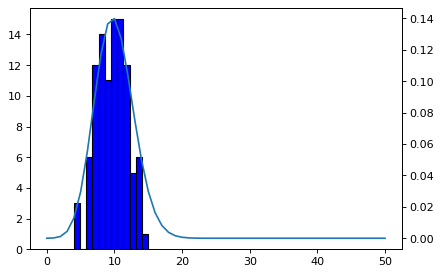

In [ ]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size)

binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
print(datos_bin.shape)

(23825,)


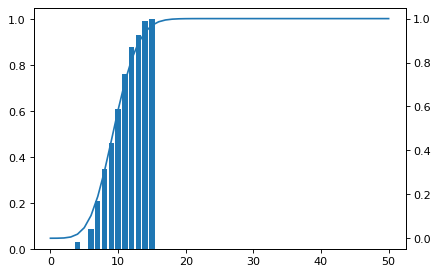

In [ ]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.66  teórica:  10.0
varianza empírica: 5.964399999999997  teórica:  8.0
asimetría empírica: -0.07668424414882587 teórica:  0.21213203435596423
curtosis empírico:  -0.515870281974975 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

| Esperanza teórica | Varianza teórica | Asimetria teórica | Curtosis teórica |
| --- | --- | --- | --- |
| 10.0 | 8.0 | 0.2121 | 0.0049 |



| Size | Esperanza empírica | Varianza empírica | Asimetria empírica | Curtosis empírica |
| --- | --- | --- | --- | ---| 
| 100 | 9.81 | 8.6339 | 0.3877 | -0.607 |
| 1000 | 10.011 | 7.7848 | 0.2433 | -0.082 |
| 5000 | 9.9806 | 7.9198 | 0.1817 | -0.105 |
| 10000 | 9.982 | 8.0736 | 0.1927 | 0.0042 |

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

In [ ]:
def percenDiff(a,b):
  return ((b/a) * 100) - 100

def getData(datos_bin):
  promedio = sum(datos_bin)/size
  var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
  asim = stats.skew(datos_bin)
  curtos = stats.kurtosis(datos_bin)
  print('esperanza empírica:',promedio,' ; teórica: ',n*p, '#### diff%: ', percenDiff(promedio, n*p))
  print('varianza empírica:',var_emp,' ; teórica: ', n*p*(1-p), '### diff%: ', percenDiff(var_emp, n*p*(1-p)))
  print('asimetría empírica:', asim, ' ; teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))), '### diff%: ', percenDiff(asim, (1-2*p)/(math.sqrt(n*p*(1-p)))))
  print('curtosis empírico: ', curtos, ' ; teórico: ',(1-6*p*(1-p))/(n*p*(1-p)), '   ### diff%: ', percenDiff(curtos, (1-6*p*(1-p))/(n*p*(1-p))))
  print("")

for i in range(10):
  size = random.randint(1000, 100000)
  n = random.randint(1, 1000)
  p = random.uniform(0, 1)
  datos_bin =stats.binom.rvs(n=n, p=p, size=size)
  print("Size:", size, "; n:", n, "; p:", p)
  getData(datos_bin)


Size: 40376 ; n: 562 ; p: 0.14521333909154932
esperanza empírica: 81.57821478105805  ; teórica:  81.60989656945071 #### diff%:  0.03883608936243377
varianza empírica: 70.27761535866301  ; teórica:  69.7590509856848 ### diff%:  -0.7378798644941469
asimetría empírica: 0.06510507609517338  ; teórica:  0.08495657524213822 ### diff%:  30.491476759730773
curtosis empírico:  -0.013376805870329633  ; teórico:  0.0036589008156631283    ### diff%:  -127.35257468136498

Size: 24550 ; n: 703 ; p: 0.7445235833856494
esperanza empírica: 523.4626883910387  ; teórica:  523.4000791201115 #### diff%:  -0.011960598590050608
varianza empírica: 132.07532882140777  ; teórica:  133.71637666927367 ### diff%:  1.2425090003636683
asimetría empírica: -0.037677577705107136  ; teórica:  -0.04229202178571998 ### diff%:  12.247188810089995
curtosis empírico:  -0.05187202461101936  ; teórico:  -0.0010563351066474544    ### diff%:  -97.96357455763727

Size: 59856 ; n: 210 ; p: 0.5196706782396058
esperanza empírica: 10

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

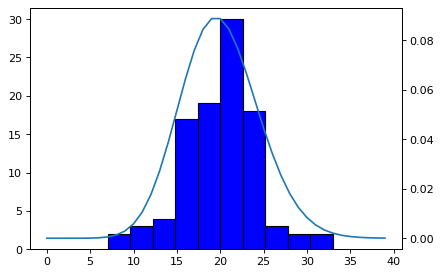

In [ ]:
## simulación de size valores v.a. poisson
size = 100
mu = 20
datos_poisson =stats.poisson.rvs(mu=mu, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'blue', edgecolor = 'black', bins = int(40/binwidth))
## probabilidad teórica
ax2 = ax.twinx()

vec = list(range(40))
##

pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()

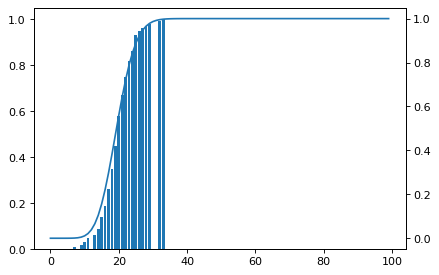

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x, cum_poisson = ecdf(np.reshape(datos_poisson, -1)) # no tenemos claro por qué es necesario ese reshape
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(100))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio)*(datos_poisson-promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)

mean, var, skew, kurt = stats.poisson.stats(mu, moments='mvsk')


print('esperanza empírica:',promedio,' teórica: ', mean)
print('varianza empírica:',var_emp,' teórica: ', var)
print('asimetría empírica:', asim, 'teórica: ', skew)
print('curtosis empírico: ', curtos, 'teórico: ', kurt)

esperanza empírica: 19.87  teórica:  20.0
varianza empírica: 19.43310000000002  teórica:  20.0
asimetría empírica: -0.011776938604697635 teórica:  0.22360679774997896
curtosis empírico:  0.9333053417394104 teórico:  0.05


#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

In [ ]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
